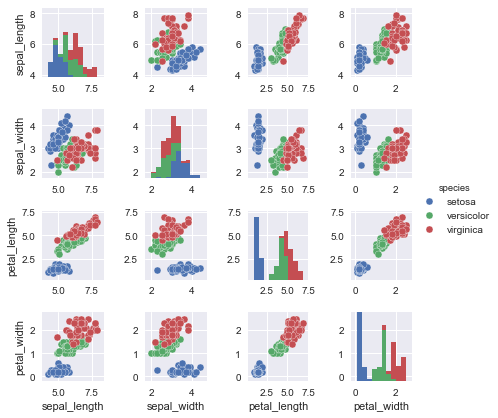

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns; sns.set()

# 加载测试数据
iris = sns.load_dataset('iris')
# 测试数据两两特征关系图
sns.pairplot(iris, hue='species', size=1.5);


斜率= [ 1.9776566]
截距= -0.903310725531


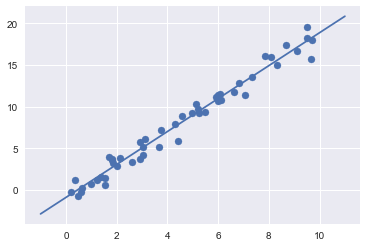

In [2]:
# 线性回归例子
from sklearn.linear_model import LinearRegression

# 生成线性回归测试数据
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

# 在原来的数组上增加一个维度
X = x[:, np.newaxis]

# 参数fit_intercept为是否计算截距，normalize是否正则化（减少过拟合）
model = LinearRegression(fit_intercept=True, normalize=True)
model.fit(X, y)

# 斜率，实际值等于2
print('斜率=',model.coef_)
# 截距，即x等于0时候y的值
print('截距=',model.intercept_)

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [3]:
# 高斯朴素贝叶斯例子
from sklearn.model_selection import train_test_split

# select feature and target
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# 划分训练数据和测试数据
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)  #输出模型的预测精度

0.97368421052631582

   sepal_length  sepal_width  petal_length  petal_width species      PCA1  \
0           5.1          3.5           1.4          0.2  setosa -2.684126   
1           4.9          3.0           1.4          0.2  setosa -2.714142   
2           4.7          3.2           1.3          0.2  setosa -2.888991   
3           4.6          3.1           1.5          0.2  setosa -2.745343   
4           5.0          3.6           1.4          0.2  setosa -2.728717   

       PCA2  
0  0.319397  
1 -0.177001  
2 -0.144949  
3 -0.318299  
4  0.326755  


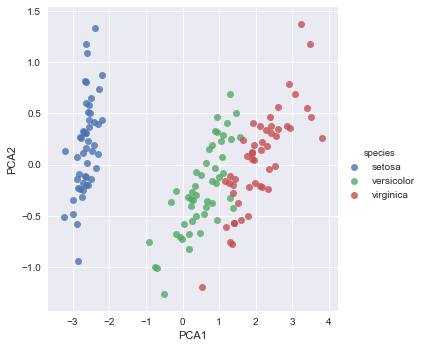

In [4]:
# 非监督学习降维例子
from sklearn.decomposition import PCA 
# n_components为保留的维度数
model = PCA(n_components=2)            
model.fit(X_iris)               
X_2D = model.transform(X_iris)
#print(X_2D.shape)

#降维后的数据可视化
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

print(iris.head())

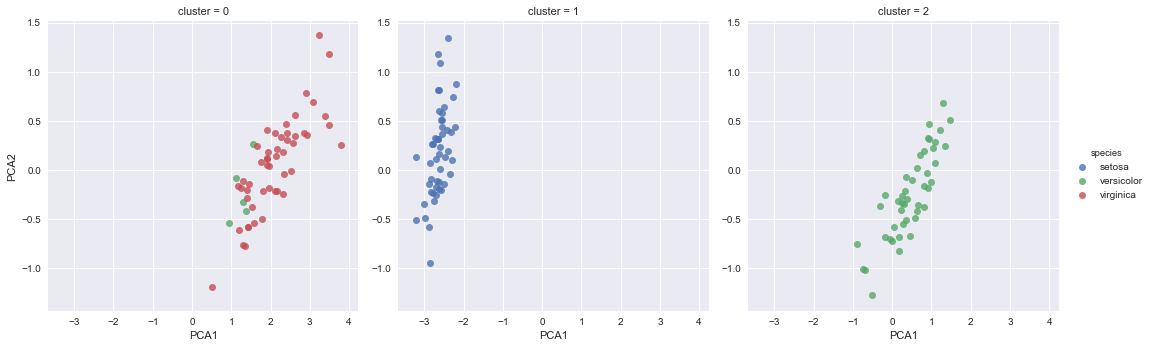

In [5]:
# 高斯混合模型聚类例子
from sklearn.mixture import GaussianMixture
# n_components指定分类的数目，covariance_type指的是协方差参数的类型
model = GaussianMixture(n_components=3, covariance_type='full')

model.fit(X_iris) 
y_gmm = model.predict(X_iris)
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

# 从下图可以看出错误分类的情况

In [6]:
# 手写数字识别例子
from sklearn.datasets import load_digits
# 加载数据
digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


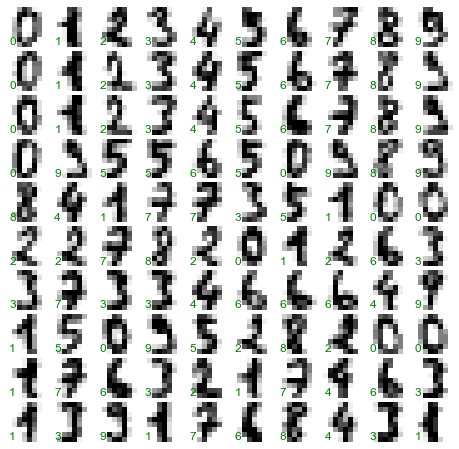

In [7]:
# 样本数1797，每一个图片是8*8像素
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [8]:
X = digits.data
y = digits.target

# 划分训练数据集和测试数据集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
# 算法精度
accuracy_score(ytest, y_model)

0.83333333333333337

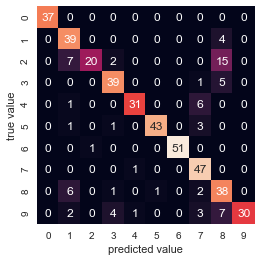

In [9]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

上图可以清晰看出错误分类的是哪些以及被错误识别成什么，如上数字1有4个被错误的认为是8，数字2有15个被认为是8。
上述四个例子仅仅简单介绍了skleran的用法，并没有涉及特征工程、模型验证等其它方面等东西。下面首先介绍模型验证，模型验证主要上使用交叉验证来确定模型等性能。在高斯朴素贝叶斯例子中将数据划分为训练集和测试集，使用测试集来验证模型精度，但从某种程度来说损失了部分训练数据。一种更常用但做法是将数据分为多个，依次使用一个作为验证集。如下图所示：
[验证集使用方式](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-5-fold-CV.png)

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# 使用K-neighbors分类算法
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)  #分成五份分别验证
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.96 (+/- 0.05)


array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [11]:
# 极端例子是使用1个作为验证集，其它为训练集
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores.mean()

0.95999999999999996

这里有一个问题，如果模型效果不佳，应该如何改进？有如下几种思路：
1. 换模型，如换一个更复杂的或似乎更合适的模型
2. 数据集，如收集更多的数据
3. 特征集，收集更多的特征或减少特征
更多理论的东西可以参考Andrew Ng的machine learning课程，这里简单介绍一下思路：

1、**画出训练和验证集的偏差和方差曲线图**

2、**画出训练和验证集的学习和验证曲线**

高偏差表示模型欠拟合，高方差表示模型过拟合，根据上述两个图确定解决方案：
高方差：1）获取更多数据集；2）使用更少的特征；3）增加正则化的λ值；
高偏差：1）增加更多的特征；2）使用更复杂的模型（如线性回归增加多项式）；3）减少正则化的λ值；

**注意：学习曲线是展示不同数据量下算法学习得分，验证曲线是展示某个因子在不同取值的算法得分**


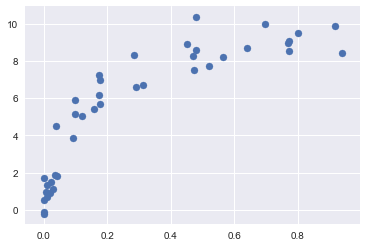

In [12]:
# 生成测试数据
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)
plt.scatter(X,y);

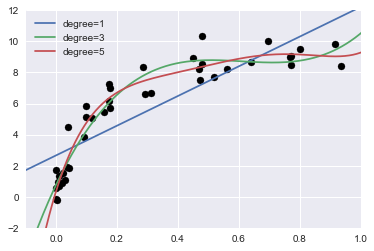

In [13]:
# 多项式回归
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

不同的degree曲线如上图所示，黑点为训练数据集，现在的问题是哪一个才是最好的模型？为此我们需要画出验证曲线。通过sklearn提供的validation_curve函数实现相关功能。

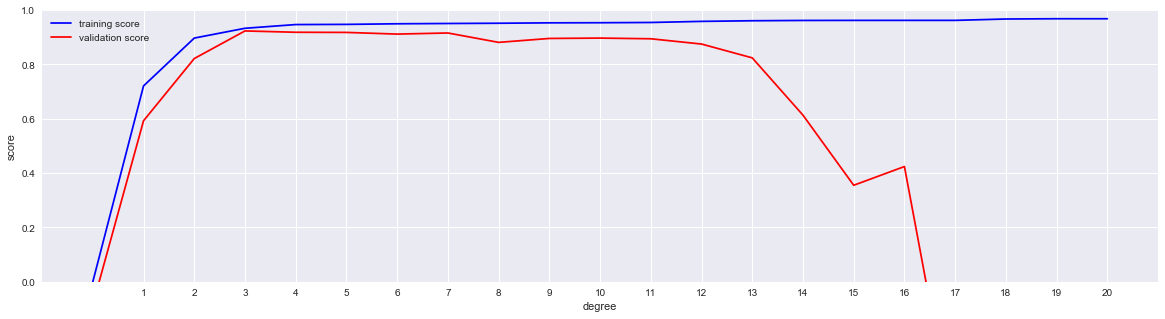

In [14]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.figure(figsize=(20,5))
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
new_ticks = np.linspace(1, 20, 20)
plt.xticks(new_ticks)
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

从上图可以看出，degree在等于3的时候验证效果最好。这里使用degree为3时画出拟合曲线如下：

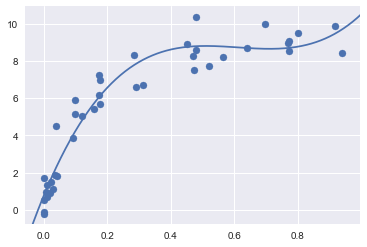

In [15]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

实际上验证曲线得到的并不是最优的，假设还是上述的例子，但是使用更大的数据集，我们来看看验证曲线。

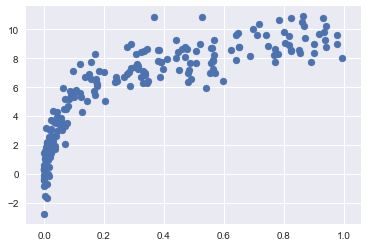

In [16]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

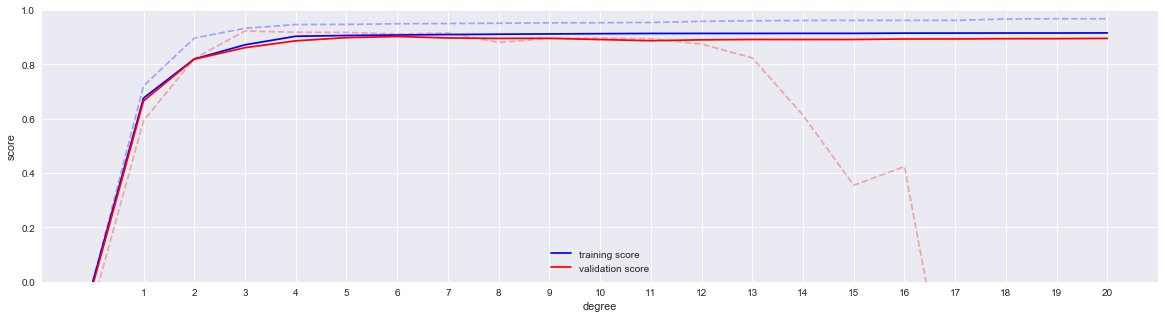

In [17]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)
plt.figure(figsize=(20,5))
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
new_ticks = np.linspace(1, 20, 20)
plt.xticks(new_ticks)
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

其中虚线代表之前数据集的验证曲线，实线为大数据集下的验证曲线，明显可以看出，当前最优的degree是6并且degree增加并不会使得验证有较大的score差距。为描述数据集大小和模型score关系，更优的方式是使用学习曲线，通过学习曲线，可以得到如下几个重要信息：

1. **一个给定模型在小数据集下可能会过拟合**，即训练成绩（相对）高，而验证成绩低

2. **一个给定模型在大数据集下可能会欠拟合**，即训练成绩（随数据集增加）逐步降低，而验证成绩逐步提升

3. **验证成绩永远都不可能超过训练成绩，最多只会无限逼近**

sklearn库提供了方便的学习曲线绘制方法。

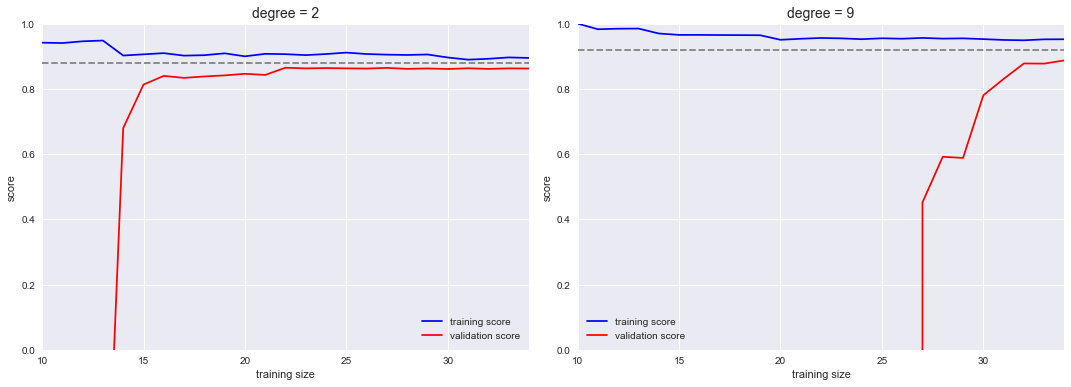

In [18]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    # 参数：cv为样本份数，其中cv-1为训练份数
    # train_sizes用来指定训练集占交叉验证cv训练集中的百分比（浮点数）或绝对个数（整数）
    # 返回值：训练样本数，训练集上准确率，交叉验证准确率
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7, 
                                         #train_sizes=np.arange(10,34,2))
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

学习曲线提供了下一步优化思路，如从从左上图可以看出，增加更多的数据并不会对模型性能提升有影响。要想提升性能唯有换模型。
从上可以看出，验证曲线（多项式degree）和学习曲线（测试数据集大小）都是从某一个方面来体现模型的性能调优。一个简单且更全面的方法是网格搜索模块。

In [22]:
from sklearn.model_selection import GridSearchCV

# 三个参数选择：1）degree值；2）是否截距；3）是否正则化；
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)
# 输出最优参数
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

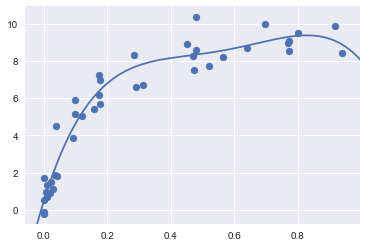

In [23]:
# 使用最优参数模型画出相关的曲线图
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

网格搜索模块还提供更多的优化参数，如指定特定的score值，计算并行度等。